## Question_9_Solution:

**Q-9.** A cyber security agent wants to check the Microsoft Malware so need he came
to you as a Machine learning Engineering with Data, You need to find the Malwareusing a supervised algorithm and you need to find the accuracy of the model.
Dataset This is the Dataset You can use this dataset for this question.

In [1]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Microsoft Malware Prediction
df = pd.read_csv('useful/Q9.csv')
df.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,00101159d08be0301ed6193eb126df84,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1609.0,0,7.0,0,NaN,53447.0,...,12416.0,1,NaN,0.0,1,0,0.0,0.0,11.0,1
1,007ae822f99412d25ccdddc48cb51c6b,win8defender,1.1.15200.1,4.10.209.0,1.275.1397.0,0,7.0,0,NaN,53447.0,...,52369.0,1,0.0,0.0,0,0,0.0,0.0,10.0,0
2,008bf0fe078bbaf98531e39e1940ae03,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1062.0,0,7.0,0,NaN,53447.0,...,56932.0,1,NaN,0.0,0,0,0.0,0.0,1.0,0
3,001eebd2639759cc82b7921c0c36f707,win8defender,1.1.15100.1,4.18.1806.18062,1.273.283.0,0,7.0,0,NaN,53447.0,...,9888.0,1,NaN,0.0,0,0,0.0,1.0,7.0,0
4,00bec230bf2577fcda2d25b9223865b3,mse,1.1.15200.1,4.10.209.0,1.275.314.0,0,7.0,0,NaN,279.0,...,13873.0,0,NaN,0.0,0,0,0.0,0.0,13.0,1


In [3]:
df.shape

(15000, 83)

In [4]:
df.columns

Index(['MachineIdentifier', 'ProductName', 'EngineVersion', 'AppVersion',
       'AvSigVersion', 'IsBeta', 'RtpStateBitfield', 'IsSxsPassiveMode',
       'DefaultBrowsersIdentifier', 'AVProductStatesIdentifier',
       'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm',
       'CountryIdentifier', 'CityIdentifier', 'OrganizationIdentifier',
       'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'Platform',
       'Processor', 'OsVer', 'OsBuild', 'OsSuite', 'OsPlatformSubRelease',
       'OsBuildLab', 'SkuEdition', 'IsProtected', 'AutoSampleOptIn', 'PuaMode',
       'SMode', 'IeVerIdentifier', 'SmartScreen', 'Firewall', 'UacLuaenable',
       'Census_MDC2FormFactor', 'Census_DeviceFamily',
       'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier',
       'Census_ProcessorCoreCount', 'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_ProcessorClass',
       'Census_PrimaryDiskTotalCapacity', 'Census_PrimaryDiskTypeName',
       'Census_

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 83 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   MachineIdentifier                                  15000 non-null  object 
 1   ProductName                                        15000 non-null  object 
 2   EngineVersion                                      15000 non-null  object 
 3   AppVersion                                         15000 non-null  object 
 4   AvSigVersion                                       15000 non-null  object 
 5   IsBeta                                             15000 non-null  int64  
 6   RtpStateBitfield                                   14943 non-null  float64
 7   IsSxsPassiveMode                                   15000 non-null  int64  
 8   DefaultBrowsersIdentifier                          738 non-null    float64
 9   AVProd

In [6]:
column_dtypes = {'IsBeta' : 'Int8',
                 'RtpStateBitfield' : 'Int16',
                 'IsSxsPassiveMode' : 'Int8',
                 'HasTpm' : 'Int8',
                 'CountryIdentifier' : 'Int64',
                 'CityIdentifier' : 'Int64',
                 'OrganizationIdentifier' : 'Int64',
                 'IsProtected' : 'Int8',
                 'AutoSampleOptIn' : 'Int8',
                 'SMode' : 'Int8',
                 'Firewall' : 'Int8',
                 'Census_HasOpticalDiskDrive' : 'Int8',
                 'Census_IsPortableOperatingSystem' : 'Int8',
                 'Census_IsFlightsDisabled' : 'Int8',
                 'Census_IsSecureBootEnabled' : 'Int8',
                 'Census_IsWIMBootEnabled' : 'Int8',
                 'Census_IsVirtualDevice' : 'Int8',
                 'Census_IsTouchEnabled' : 'Int8',
                 'Census_IsPenCapable' : 'Int8',
                 'Census_IsAlwaysOnAlwaysConnectedCapable': 'Int8',
                 'Wdft_IsGamer' : 'Int8',
                 'HasDetections' : 'int'}

In [7]:
columns_to_ignore = ('ProductName',
                     'DefaultBrowsersIdentifier', 
                     'PuaMode',
                     'Census_ProcessorClass', 
                     'Census_InternalBatteryType', 
                     'Census_IsFlightingInternal', 
                     'Census_ThresholdOptIn', # 
                     
                     # numerical features
                     'Census_PrimaryDiskTotalCapacity', 
                     'Census_SystemVolumeTotalCapacity', 
                     'Census_TotalPhysicalRAM',        
                     'Census_InternalPrimaryDisplayResolutionHorizontal',
                     'Census_InternalPrimaryDisplayResolutionVertical',
                     'Census_InternalPrimaryDiagonalDisplaySizeInInches',
                     'Census_InternalBatteryNumberOfCharges',
                     'IsBeta', 
                     'AutoSampleOptIn', 
                     'UacLuaenable', 
                     'Census_IsWIMBootEnabled',
                     
                     'Census_FlightRing_not',
                     'Census_IsAlwaysOnAlwaysConnectedCapable',
                     'Census_IsSecureBootEnabled',
                     'Census_IsTouchEnabled',
                     'Census_IsVirtualDevice',
                     'SMode'
                    )

In [8]:
label_col = 'HasDetections'

In [9]:
df = pd.read_csv('useful/Q9.csv', usecols = lambda x: x not in columns_to_ignore, dtype = column_dtypes)
df.head()

,MachineIdentifier,EngineVersion,AppVersion,AvSigVersion,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,...,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightsDisabled,Census_FlightRing,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsPenCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,00101159d08be0301ed6193eb126df84,1.1.15200.1,4.18.1807.18075,1.275.1609.0,7,0,53447.0,1.0,1.0,1,...,IS_GENUINE,Retail,0,Retail,142.0,12416.0,0,0,11.0,1
1,007ae822f99412d25ccdddc48cb51c6b,1.1.15200.1,4.10.209.0,1.275.1397.0,7,0,53447.0,1.0,1.0,1,...,IS_GENUINE,Retail,0,Retail,807.0,52369.0,0,0,10.0,0
2,008bf0fe078bbaf98531e39e1940ae03,1.1.15200.1,4.18.1807.18075,1.275.1062.0,7,0,53447.0,1.0,1.0,1,...,IS_GENUINE,Retail,0,Retail,556.0,56932.0,0,0,1.0,0
3,001eebd2639759cc82b7921c0c36f707,1.1.15100.1,4.18.1806.18062,1.273.283.0,7,0,53447.0,1.0,1.0,1,...,IS_GENUINE,Retail,0,Retail,142.0,9888.0,0,1,7.0,0
4,00bec230bf2577fcda2d25b9223865b3,1.1.15200.1,4.10.209.0,1.275.314.0,7,0,279.0,4.0,3.0,0,...,IS_GENUINE,Retail,<NA>,Retail,142.0,13873.0,0,0,13.0,1


In [10]:
# Checking Unique and NA Values:
for col in df.columns:
    print(f'"{col}" has {df[col].nunique()} unique values and {df[col].isna().sum() / len(df) * 100:.5f}% NA values.')
    

"MachineIdentifier" has 15000 unique values and 0.00000% NA values.
"EngineVersion" has 35 unique values and 0.00000% NA values.
"AppVersion" has 59 unique values and 0.00000% NA values.
"AvSigVersion" has 1908 unique values and 0.00000% NA values.
"RtpStateBitfield" has 6 unique values and 0.38000% NA values.
"IsSxsPassiveMode" has 2 unique values and 0.00000% NA values.
"AVProductStatesIdentifier" has 651 unique values and 0.39333% NA values.
"AVProductsInstalled" has 5 unique values and 0.39333% NA values.
"AVProductsEnabled" has 4 unique values and 0.39333% NA values.
"HasTpm" has 2 unique values and 0.00000% NA values.
"CountryIdentifier" has 197 unique values and 0.00000% NA values.
"CityIdentifier" has 4752 unique values and 3.85333% NA values.
"OrganizationIdentifier" has 26 unique values and 30.32000% NA values.
"GeoNameIdentifier" has 193 unique values and 0.00000% NA values.
"LocaleEnglishNameIdentifier" has 140 unique values and 0.00000% NA values.
"Platform" has 4 unique v

In [11]:
df.isnull().sum()

MachineIdentifier                            0
EngineVersion                                0
AppVersion                                   0
AvSigVersion                                 0
RtpStateBitfield                            57
IsSxsPassiveMode                             0
AVProductStatesIdentifier                   59
AVProductsInstalled                         59
AVProductsEnabled                           59
HasTpm                                       0
CountryIdentifier                            0
CityIdentifier                             578
OrganizationIdentifier                    4548
GeoNameIdentifier                            0
LocaleEnglishNameIdentifier                  0
Platform                                     0
Processor                                    0
OsVer                                        0
OsBuild                                      0
OsSuite                                      0
OsPlatformSubRelease                         0
OsBuildLab   

In [12]:
df.nunique()

MachineIdentifier                         15000
EngineVersion                                35
AppVersion                                   59
AvSigVersion                               1908
RtpStateBitfield                              6
IsSxsPassiveMode                              2
AVProductStatesIdentifier                   651
AVProductsInstalled                           5
AVProductsEnabled                             4
HasTpm                                        2
CountryIdentifier                           197
CityIdentifier                             4752
OrganizationIdentifier                       26
GeoNameIdentifier                           193
LocaleEnglishNameIdentifier                 140
Platform                                      4
Processor                                     3
OsVer                                         4
OsBuild                                      26
OsSuite                                       4
OsPlatformSubRelease                    


Bad key text.latex.preview in file /home/ali/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.7.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/ali/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.7.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /home/ali/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality paramet

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

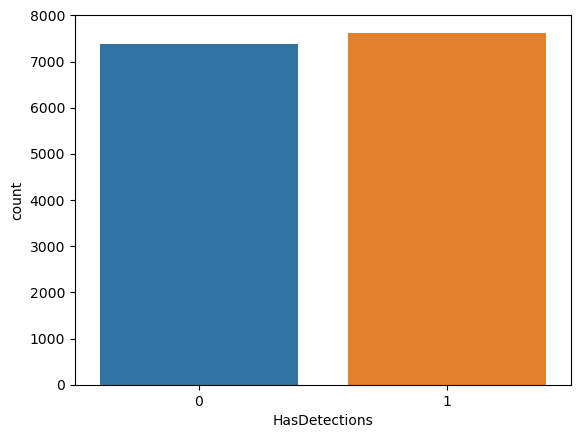

In [13]:
sns.countplot(x = df[label_col])
plt.show()

In [14]:
df.columns

Index(['MachineIdentifier', 'EngineVersion', 'AppVersion', 'AvSigVersion',
       'RtpStateBitfield', 'IsSxsPassiveMode', 'AVProductStatesIdentifier',
       'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm',
       'CountryIdentifier', 'CityIdentifier', 'OrganizationIdentifier',
       'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'Platform',
       'Processor', 'OsVer', 'OsBuild', 'OsSuite', 'OsPlatformSubRelease',
       'OsBuildLab', 'SkuEdition', 'IsProtected', 'IeVerIdentifier',
       'SmartScreen', 'Firewall', 'Census_MDC2FormFactor',
       'Census_DeviceFamily', 'Census_OEMNameIdentifier',
       'Census_OEMModelIdentifier', 'Census_ProcessorCoreCount',
       'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_PrimaryDiskTypeName',
       'Census_HasOpticalDiskDrive', 'Census_ChassisTypeName',
       'Census_PowerPlatformRoleName', 'Census_OSVersion',
       'Census_OSArchitecture', 'Census_OSBranch', 'Census_OSBuildNumber',
 

In [15]:
# Split features and Target:
X = df.drop('MachineIdentifier', axis = 1)
y = df['MachineIdentifier']

In [16]:
# Preprocessing:
import sys

def preprocess_cat_values(df):
    temp = df.copy()
    
    cols = temp.select_dtypes(include = [object]).columns.tolist()   
    
    # use 'sys.intern' to reduce memory use
    # see why here: https://stackoverflow.com/questions/76104472/python-str-lower-causes-memory-leak
    temp[cols] = temp[cols].astype(str).apply(lambda x: x.str.lower().apply(sys.intern))
    
    os_build_lab_cat = 'OsBuildLab'
    if os_build_lab_cat in temp.columns:
        os_build_lab_df = temp[os_build_lab_cat].str.split(pat = '.', n = 5, expand = True)
        os_build_lab_df = os_build_lab_df.astype(str).apply(lambda x: x.str.lower().apply(sys.intern))
        os_build_lab_df = os_build_lab_df.add_prefix(os_build_lab_cat + '_')
        
        temp = pd.concat([temp, os_build_lab_df], axis = 1)
        temp = temp.drop(columns = os_build_lab_cat)
    
    smart_screen_cat = 'SmartScreen'
    if smart_screen_cat in temp.columns:
        temp.loc[temp[smart_screen_cat] == 'promt', smart_screen_cat] = 'prompt'
        temp.loc[temp[smart_screen_cat] == '00000000', smart_screen_cat] = '0'
        temp[smart_screen_cat] = temp[smart_screen_cat].astype(str).apply(sys.intern)
        
    disk_type_cat = 'Census_PrimaryDiskTypeName'
    if disk_type_cat in temp.columns:
        disk_types = ['HDD', 'SSD']
        temp.loc[~temp[disk_type_cat].isin(disk_types), disk_type_cat] == 'na'                                
        temp[disk_type_cat] = temp[disk_type_cat].astype(str).apply(sys.intern)
        
    role_name_cat = 'Census_PowerPlatformRoleName'
    if role_name_cat in temp.columns:
        na_types = ['unspecified', 'unknown', np.nan]
        temp.loc[temp[role_name_cat].isin(na_types), role_name_cat] == 'na'                             
        temp[role_name_cat] = temp[role_name_cat].astype(str).apply(sys.intern)
    
    return temp

In [17]:
X = preprocess_cat_values(X)

In [18]:
X.shape, y.shape

((15000, 63), (15000,))

In [19]:
X.isnull().sum()

ProductName           0
EngineVersion         0
AppVersion            0
AvSigVersion          0
RtpStateBitfield    111
                   ... 
OsBuildLab_0          0
OsBuildLab_1          0
OsBuildLab_2          0
OsBuildLab_3          0
OsBuildLab_4          0
Length: 64, dtype: int64

In [20]:
str_cols = X.select_dtypes(include = 'object').columns
non_str_cols = X.select_dtypes(exclude = 'object').columns

In [21]:
na_value = -1

X[str_cols] = X[str_cols].fillna('na')
X[non_str_cols] = X[non_str_cols].fillna(na_value)
X.isna().sum()

ProductName         0
EngineVersion       0
AppVersion          0
AvSigVersion        0
RtpStateBitfield    0
                   ..
OsBuildLab_0        0
OsBuildLab_1        0
OsBuildLab_2        0
OsBuildLab_3        0
OsBuildLab_4        0
Length: 64, dtype: int64

In [22]:
# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [23]:
# Performing Ordinal Encoding:

unknown_value = -100
oe = OrdinalEncoder(handle_unknown = 'use_encoded_value', dtype = 'int32', unknown_value = unknown_value)
X_train_encoded = oe.fit_transform(X_train)
X_test_encoded = oe.transform(X_test)

max_vals = X_train_encoded.max(axis = 0) + 1
X_test_encoded = np.where(X_test_encoded == unknown_value, max_vals, X_test_encoded)

In [24]:
X_train_encoded.shape, X_test_encoded.shape, y_train.shape, y_test.shape

((24000, 64), (6000, 64), (24000,), (6000,))

In [25]:
# Create a Random Forest classifier
classifier = RandomForestClassifier(n_jobs=-1)

# Train the classifier on the training data
classifier.fit(X_train_encoded, y_train)

# Make predictions on the testing data
y_pred = classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100,'%')

ValueError: could not convert string to float: 'win8defender'